In [1]:
import pandas as pd
import re
import numpy as np



In [9]:
# Downloading database Shark Attacks

df=pd.read_csv("./Input/GSAF5.csv", encoding = "ISO-8859-1")
display(df.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [10]:
# Understanding database 
#How many rows and columns are in the database?
print("Number of rows and columns: ", df.shape)

Number of rows and columns:  (5992, 24)


In [11]:
# Understanding database 
# How the computer transcribes names of columns?
print(df.columns)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [12]:
# Understanding database 
# Understand how data in rows is it interpreted as types
df.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

In [13]:
# How many null columns are there?

null_cols = df.isnull().sum()
null_cols

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [14]:
# Delete unnecesary information
# Delete unnamed columns 22,23 because they do not add any information, probably a mistake 

df1 = df.drop(["Unnamed: 22", "Unnamed: 23"], axis=1) 
print(df1.columns)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')


In [15]:
# Insert hypothesis
# Hypothesis Australia is the country with most attacks

# Delete columns with unwanted information
  
df2 = df1.drop(['Case Number', 'Date','Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order'], axis=1) 
print(df2.columns)

Index(['Year', 'Type', 'Country', 'Area', 'Location', 'Activity'], dtype='object')


In [16]:
# Analysis column Type
# Count number of invalid fields from Type of attack 

invalid = df2[(df2['Type']=='Invalid')]
print('Number of invalids:', len(invalid))



Number of invalids: 519


In [17]:
# Analysis column Type
# Display invalid rows

invalid.sort_values(['Country'])




,Year,Type,Country,Area,Location,Activity
1455,2004,Invalid,TONGA,Nuku'alofa,30 nautical miles offshore,Five men on makeshift raft after their 10 m fi...
607,2011,Invalid,ANTIGUA,St John's,Fort James Beach,Swimming
3493,1963,Invalid,ATLANTIC OCEAN,Between Southampton & Canary Islands,NaN,"Greek steamship Lakonia caught fire, 98 of her..."
5747,1852,Invalid,ATLANTIC OCEAN,NaN,NaN,NaN
4680,1935,Invalid,AUSTRALIA,New South Wales,Coogee,"Disappeared 11 days earlier, probable homicide..."
...,...,...,...,...,...,...
303,2014,Invalid,NaN,NaN,NaN,Sea disaster
3162,1970,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina
3435,1964,Invalid,NaN,NaN,NaN,Spearfishing
5189,1909,Invalid,NaN,NaN,Near the equator,Jumped overboard


In [18]:
# Analysis column Type
# Remove invalid fields from Type column
# All the fields have relevant data apart from invalid ones

invalid_rows=df2[df2["Type"]== 'Invalid']
invalid_rows.index
invalid_rows

df3=df2.drop(invalid_rows.index)


In [19]:
# Analysis column Type
# How many fields are there for boat, boating and sea disaster? 

df3['Type'].value_counts()

Unprovoked      4386
Provoked         557
Sea Disaster     220
Boat             200
Boating          110
Name: Type, dtype: int64

In [20]:
# Analysis column Type
#Change Boating for Boat 

def Clean_names(TypeName):
    if re.search('ing', TypeName):
        pos= re.search('ing', TypeName).start()
        return TypeName[:pos]
    else:
        return TypeName

df3['Type']=df3["Type"].apply(Clean_names)
display(df3)

#Check if boating was substituted by boat
check = df3[df3['Type']== 'Boating'] 
  
print(check) 

,Year,Type,Country,Area,Location,Activity
0,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing
1,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing
2,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing
3,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing
4,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing
...,...,...,...,...,...,...
5987,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving
5988,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving
5989,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming
5990,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN


Empty DataFrame
Columns: [Year, Type, Country, Area, Location, Activity]
Index: []


In [21]:
# Analysis column Year

print('\n.Unique values in column Year:', df3.Year.unique())


.Unique values in column Year: [2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003
 2002 2001 2000 1999 1998 1997 1996 1995 1984 1994 1993 1992 1991 1990
 1989 1988 1987 1986 1985 1983 1982 1981 1980 1979 1978 1977 1976 1975
 1974 1973 1972 1971 1970 1969 1968 1967 1966 1965 1964 1963 1962 1961
 1960 1959 1958 1957 1956 1955 1954 1953 1952 1951 1950 1949 1948 1848
 1947 1946 1945 1944 1943 1942 1941 1940 1939 1938 1937 1936 1935 1934
 1933 1932 1931 1930 1929 1928 1927 1926 1925 1924 1923 1922 1921 1920
 1919 1918 1917 1916 1915 1914 1913 1912 1911 1910 1909 1908 1907 1906
 1905 1904 1903 1902 1901 1900 1899 1898 1897 1896 1895 1894 1893 1892
 1891 1890 1889 1888 1887 1886 1885 1884 1883 1882 1881 1880 1879 1878
 1877 1876 1875 1874 1873 1872 1871 1870 1869 1868 1867 1865 1864 1863
 1862 1861 1860 1859 1858 1856 1855 1854 1853 1852 1851 1850 1849 1847
 1846 1845 1844 1842 1841 1840 1839 1837 1836 1835 1834 1832 1830 1829
 1828 1827 1826 1825 1822 1817 1816 1812 1811

In [22]:
# Analysis column Year
# Remove ceros

df3['Year'].value_counts()

2015    126
0       122
2011    117
2014    116
2013    115
       ... 
1638      1
1642      1
1738      1
1742      1
1617      1
Name: Year, Length: 225, dtype: int64

In [23]:
# Analysis column Year
# Remove non filled info

df3['Year']=pd.to_numeric(df3['Year'])
df3['Year'].dropna(inplace=True)

df3.shape

#Remove ceros

cero_rows=df3[df3["Year"]==0]
df4=df3.drop(cero_rows.index)
df4.shape
#display(data1)
display(df4['Year'].value_counts().reset_index())



,index,Year
0,2015,126
1,2011,117
2,2014,116
3,2013,115
4,2008,111
...,...,...
219,1749,1
220,1721,1
221,1637,1
222,1617,1


In [24]:
#3 Analysis nature of selected columns
# Column Year only visualizing years from 1950, prior that date assuming quality of data irregular 

df5 = df4[df4['Year']>=1950].sort_values(by=['Year'])
display(df5)
df5['Year'].value_counts()


,Year,Type,Country,Area,Location,Activity
4270,1950,Unprovoked,FIJI,NaN,Near Lautoka,NaN
4244,1950,Unprovoked,USA,Florida,"Rock Harbor, Key Largo, Monroe County","Goggle-diving for seaweeds, but standing in water"
4242,1950,Unprovoked,USA,Texas,Near Port Arthur,Swimming
4241,1950,Unprovoked,CUBA,Caribbean Sea,NaN,Swept off deck of S.S.Frontenac enroute from W...
4240,1950,Provoked,ITALY,Savona,Albenga,Fishing
...,...,...,...,...,...,...
69,2016,Unprovoked,AUSTRALIA,New South Wales,"First Sun Beach, Byron Bay",Swimming
70,2016,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing
71,2016,Unprovoked,USA,Florida,"Off Singer Island, Palm Beach County",Spearfishing
74,2016,Unprovoked,USA,Florida,"Florida Keys, Monroe County",Fishing


2015    126
2011    117
2014    116
2013    115
2008    111
       ... 
1952     27
1969     27
1977     23
1979     23
1978     22
Name: Year, Length: 67, dtype: int64

In [25]:
# Analysis column Country
# Delete rows without information 

df6=df5.dropna(subset=['Country'])

display(df6)

# Check if cleaning occurred 
#df6['Country'].isnull().sum()

,Year,Type,Country,Area,Location,Activity
4270,1950,Unprovoked,FIJI,NaN,Near Lautoka,NaN
4244,1950,Unprovoked,USA,Florida,"Rock Harbor, Key Largo, Monroe County","Goggle-diving for seaweeds, but standing in water"
4242,1950,Unprovoked,USA,Texas,Near Port Arthur,Swimming
4241,1950,Unprovoked,CUBA,Caribbean Sea,NaN,Swept off deck of S.S.Frontenac enroute from W...
4240,1950,Provoked,ITALY,Savona,Albenga,Fishing
...,...,...,...,...,...,...
69,2016,Unprovoked,AUSTRALIA,New South Wales,"First Sun Beach, Byron Bay",Swimming
70,2016,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing
71,2016,Unprovoked,USA,Florida,"Off Singer Island, Palm Beach County",Spearfishing
74,2016,Unprovoked,USA,Florida,"Florida Keys, Monroe County",Fishing


In [26]:
# Analysis column Country
# Check how many unique values are in column country 

print('\n.Unique values in column Country:', df6.Country.unique())

countries=df6.Country.unique()

print('\n.Type of data:', type(countries))


.Unique values in column Country: ['FIJI' 'USA' 'CUBA' 'ITALY' 'JAPAN' 'AUSTRALIA' 'SAUDI ARABIA'
 'EL SALVADOR' 'NEW CALEDONIA' 'SOUTH AFRICA' 'SINGAPORE' 'PANAMA'
 'INDONESIA' 'LIBERIA' 'SRI LANKA' 'GREECE' 'JAMAICA' 'MOZAMBIQUE'
 'PHILIPPINES' 'NEW GUINEA' 'PACIFIC OCEAN' 'COLUMBIA' 'FRENCH POLYNESIA'
 'MEXICO' 'PAPUA NEW GUINEA' 'NETHERLANDS ANTILLES' 'SUDAN' 'INDIA'
 'MAURITIUS' 'CANADA' 'INDIAN OCEAN' 'IRAN' 'ECUADOR' 'HONG KONG'
 'UNITED KINGDOM' 'AMERICAN SAMOA' 'CROATIA' 'THE BALKANS' 'BERMUDA'
 'ARGENTINA' 'MARTINIQUE' 'SUDAN?' 'NORTH ATLANTIC OCEAN '
 'NORTH PACIFIC OCEAN' 'MONTENEGRO' 'YEMEN' 'MADAGASCAR' 'MALTA' 'SENEGAL'
 'NEW ZEALAND' 'GABON' 'MAYOTTE' 'COSTA RICA' 'MID ATLANTIC OCEAN'
 'PORTUGAL' 'SOLOMON ISLANDS' 'MARSHALL ISLANDS' 'KENYA' 'BAHAMAS'
 'ANDAMAN / NICOBAR ISLANDAS' 'TURKEY' 'SAMOA' 'TONGA' 'TAIWAN' 'AZORES'
 'MALDIVE ISLANDS' 'ATLANTIC OCEAN' 'CARIBBEAN SEA' 'SOUTH KOREA'
 'VENEZUELA' 'NORTH ATLANTIC OCEAN' 'ENGLAND' 'NORTH SEA'
 'RED SEA / INDIAN OCEAN'

In [27]:
# Analysis column Country
# Filtering only rows which are not misleading ex. not showing ATLANTIC OCEAN, GULF OF ADEN. Did not perform the entire cleaning!

df7 = df6[(df6['Country'] != 'ATLANTIC OCEAN') & (df6['Country'] != 'GULF OF ADEN')]

# To test if Atlantic Ocean was removed

df7['Country'].value_counts().reset_index().sort_values(['index']).head(20)

,index,Country
79,TONGA,2
89,ADMIRALTY ISLANDS,1
73,AMERICAN SAMOA,3
101,ANDAMAN / NICOBAR ISLANDAS,1
115,ANGOLA,1
119,ARGENTINA,1
135,ARUBA,1
1,AUSTRALIA,682
72,AZORES,3
5,BAHAMAS,78


In [28]:
# Validating hypothesis
# Calculating countries where most incidents happen

df7["Country"].value_counts()

# Australia is not the first country but US where more attacks happen
# US is the country, where? second hypothesis Florida

USA                               1635
AUSTRALIA                          682
SOUTH AFRICA                       406
PAPUA NEW GUINEA                   109
BRAZIL                              88
                                  ... 
NORWAY                               1
PORTUGAL                             1
FEDERATED STATES OF MICRONESIA       1
ARUBA                                1
UNITED ARAB EMIRATES                 1
Name: Country, Length: 137, dtype: int64

In [29]:
#Calculating where in the US is most common for incidents to happen

#Cleaning area column to perform analysis on state where incidents happen the most

#Create new dataframe with only country and area

# df7 Dataframe zooming country USA and area only

df8 = df7[["Country","Area"]]

df9=df8[(df8['Country']=='USA')]

display(df9)

print('\n.Unique values in Area dataframe condition USA as country:', df9.Area.unique())

# Cleaning subdataframe Country USA and Area

df10=df9.dropna()
display(df10)

print('\n.Unique values in Area dataframe df8 cleaning null values:', df10.Area.unique())

# Check null values from Area and Country were deleted

null_cols2 = df10.isnull().sum()
null_cols2


,Country,Area
4244,USA,Florida
4242,USA,Texas
4245,USA,New York
4234,USA,California
4246,USA,Florida
...,...,...
64,USA,Hawaii
67,USA,Florida
71,USA,Florida
74,USA,Florida



.Unique values in Area dataframe condition USA as country: ['Florida' 'Texas' 'New York' 'California' 'Hawaii' 'South Carolina'
 'Puerto Rico' 'Georgia' 'Wake Island' 'Virginia' 'Rhode Island'
 'North Carolina' 'US Virgin Islands' 'New Jersey' 'Delaware'
 'Connecticut' 'Mississippi' 'Pennsylvania' 'Massachusetts' nan 'Oregon'
 'Florida ' 'Alabama' 'Louisiana' 'North & South Carolina' 'Washington'
 'Maryland' 'Missouri' 'Alaska' 'Johnston Atoll' 'South Carolina '
 'New Mexico' 'Kentucky' 'Guam' 'Palmyra Atoll' 'Maine']


,Country,Area
4244,USA,Florida
4242,USA,Texas
4245,USA,New York
4234,USA,California
4246,USA,Florida
...,...,...
64,USA,Hawaii
67,USA,Florida
71,USA,Florida
74,USA,Florida



.Unique values in Area dataframe df8 cleaning null values: ['Florida' 'Texas' 'New York' 'California' 'Hawaii' 'South Carolina'
 'Puerto Rico' 'Georgia' 'Wake Island' 'Virginia' 'Rhode Island'
 'North Carolina' 'US Virgin Islands' 'New Jersey' 'Delaware'
 'Connecticut' 'Mississippi' 'Pennsylvania' 'Massachusetts' 'Oregon'
 'Florida ' 'Alabama' 'Louisiana' 'North & South Carolina' 'Washington'
 'Maryland' 'Missouri' 'Alaska' 'Johnston Atoll' 'South Carolina '
 'New Mexico' 'Kentucky' 'Guam' 'Palmyra Atoll' 'Maine']


Country    0
Area       0
dtype: int64

In [30]:
#Calculating where in the US is most common for incidents to happen

df11 = df10['Area'].value_counts().reset_index().sort_values(['index'])

data = df10['Area'].value_counts()
type(data)

df11.head()

# Comment Reset Index se aplica con funciones como value_count group_by para poder acceder a los datos mediante las columnas
# Comment Resent Index redefine la columna país que ahora tiene como título el nombre index y como filas los nombres de los estados

,index,Area
8,Alabama,11
34,Alaska,1
1,California,227
25,Connecticut,1
16,Delaware,4


In [31]:
#Calculating where in the US is most common for incidents to happen

df12=df11.rename(columns={'index':'State', 'Area':'Attacks'})
display(df12)



,State,Attacks
8,Alabama,11
34,Alaska,1
1,California,227
25,Connecticut,1
16,Delaware,4
0,Florida,856
27,Florida,1
10,Georgia,9
21,Guam,1
2,Hawaii,201


In [32]:
#Calculating where in the US is most common for incidents to happen
#Clean information on State

df12.sort_values(['Attacks'])
df12['State'].tolist()
# tolist transforma df12 en una serie con los valores de los estados

['Alabama',
 'Alaska',
 'California',
 'Connecticut',
 'Delaware',
 'Florida',
 'Florida ',
 'Georgia',
 'Guam',
 'Hawaii',
 'Johnston Atoll',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Mississippi',
 'Missouri',
 'New Jersey',
 'New Mexico',
 'New York',
 'North & South Carolina',
 'North Carolina',
 'Oregon',
 'Palmyra Atoll',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Carolina ',
 'Texas',
 'US Virgin Islands',
 'Virginia',
 'Wake Island',
 'Washington']

In [33]:
#Calculating where in the US is most common for incidents to happen
#Clean information on State
# Limpiar columna estados

df12['State'] = df12['State'].str.replace(' North Carolina', 'North Carolina')
df12['State'] = df12['State'].str.replace('North & South Carolina', 'North Carolina')
df12['State'] = df12['State'].str.replace('North Carolina ', 'North Carolina')
df12['State'] = df12['State'].str.replace('South Carolina ', 'South Carolina')
df12['State'] = df12['State'].str.replace('New York ', 'New York')
df12['State'] = df12['State'].str.replace(' New Jersey', 'New Jersey')
df12['State'] = df12['State'].str.replace('Florida ','Florida')

#display (df12)

df12.sort_values(['Attacks'])

# Comment transformar a string df12['State'] porque no todos los objectos son strings y usar funcion replace para strings
# Comment regex forma parte de la función replace 

,State,Attacks
28,Missouri,1
26,South Carolina,1
30,Pennsylvania,1
24,North Carolina,1
32,New Mexico,1
33,Wake Island,1
23,Maine,1
29,Kentucky,1
31,Johnston Atoll,1
22,Washington,1


In [34]:

#Calculating where in the US is most common for incidents to happen
df12['State'].tolist()


['Alabama',
 'Alaska',
 'California',
 'Connecticut',
 'Delaware',
 'Florida',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Johnston Atoll',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Mississippi',
 'Missouri',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Carolina',
 'Oregon',
 'Palmyra Atoll',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Carolina',
 'Texas',
 'US Virgin Islands',
 'Virginia',
 'Wake Island',
 'Washington']

In [35]:
#Calculating where in the US is most common for incidents to happen

df13 = df12.groupby(['State'])['Attacks'].sum().reset_index()

# sumar los ataques agrupando los estados para que no haya dos north carolinas sino una 

In [36]:
#Calculating where in the US is most common for incidents to happen

df13.sort_values(['Attacks'])

# State where there are more attacks is Florida

,State,Attacks
31,Washington,1
1,Alaska,1
3,Connecticut,1
23,Pennsylvania,1
18,New Mexico,1
7,Guam,1
16,Missouri,1
9,Johnston Atoll,1
10,Kentucky,1
30,Wake Island,1


In [37]:
#Visualizing attacks per state using geopandas library

import geopandas as gpd

In [41]:
#Visualizing attacks per state using geopandas library

usa = gpd.read_file('./Other/states.shx')

In [42]:
#Visualizing attacks per state using geopandas library
usa.shape

# Call variable it has 51 corresponding 51 states and not weird islands such as Guam

(51, 6)

In [43]:
#Visualizing attacks per state using geopandas library
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [44]:
#Visualizing attacks per state using geopandas library
# change our dataframe to be able to merge it with usa and add attacks

df13.rename(columns={'State':'STATE_NAME'}, inplace=True)
df13.columns


Index(['STATE_NAME', 'Attacks'], dtype='object')

In [45]:
#Visualizing attacks per state using geopandas library
map = usa.merge(df13, on='STATE_NAME', how='left')

# Comment left se queda con los 51 estados de la variable usa que es un dataframe pero elimina las islas que estaban en el df11 como guam porque no las incluye como estados

In [46]:
# map is the new dataframe with usa and df11 merged incl. attacks
map.shape

(51, 7)

In [47]:
map.plot()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


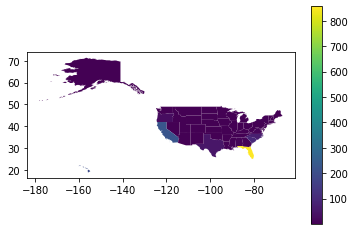

In [48]:
map.plot(column='Attacks', legend=True)

In [51]:
usa.to_csv('./Output/usageolocalizacion.csv')
df13.to_csv('./Output/df13resultadofinal.csv')